In [1]:
import cv2
import numpy
import mss
import matplotlib.pyplot as plt
import pytesseract
import numpy as np

from copy import copy

In [2]:
MONITOR = {"top": 284, "left": 0, "width": 770, "height": 500}
BOTTOM_LEFT_WINDOW = {"top": 540, "left": 0, "width": 770, "height": 505}
PICS_DIR = "../pics/"

In [3]:
def get_screenshot(monitor=MONITOR):
    with mss.mss() as screenshot:
        return numpy.array(screenshot.grab(monitor))

def read_image(filename):
    return cv2.imread(PICS_DIR+filename, cv2.IMREAD_COLOR)
    
    
def show_image(*var_images, size="small"):
    """ Displays all images side by side.
    """
    if size == "small":
        figsize = (5, 5)
    elif size == "medium":
        figsize = (8, 8)
    elif size == "large":
        figsize = (12, 12)
    
    rgb_images = []
    for an_image in var_images:
        an_image = cv2.cvtColor(an_image, cv2.COLOR_BGRA2RGB)
        rgb_images.append(an_image)
    
    NUM_ROWS = 1
    IMGs_IN_ROW = len(rgb_images)
      
    #  Note to self: global image size setting:
    # plt.rcParams["figure.figsize"] = (20, 10)
    f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=figsize)

    if len(rgb_images) == 1:
        ax.imshow(rgb_images[0])
    else:
        for i, rgb in enumerate(rgb_images):
            ax[i].imshow(rgb)
    
    plt.tight_layout()
    plt.show()

In [10]:
def bw_processing(filename):
    """Turn image to black text on white background. Return original too."""
    img = read_image(filename)
    # Keep light colors, but turn the rest black.
    light_text_only = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)[1]

    # Invert to be white background with black remaining
    black_mask = np.all(light_text_only == [0,0,0], axis=-1)
    non_black = np.any(light_text_only != [0,0,0], axis=-1)
    light_text_only[black_mask] = [255, 255, 255]
    light_text_only[non_black] = [0, 0, 0]
    
    return light_text_only, img



def image_to_string(img, psm="--psm 6"):
#     print(pytesseract.image_to_string(img, config=f"{psm}"))
#     print(pytesseract.image_to_string(img, config=f"{psm} digits"))
    return pytesseract.image_to_string(img, config=f"{psm} digits -c tessedit_char_whitelist=+0123456789").strip()



def img_to_str_bw_processing(filename, size="small"):
    bw_image, original = bw_processing(filename)
    
    zoom_factor = 2
    zoom_img = copy(bw_image)
    zoom_img = cv2.resize(
        bw_image,
        (bw_image.shape[1]*zoom_factor, bw_image.shape[0]*zoom_factor)
    )
    blur_img = copy(zoom_img)
    blur_img = cv2.medianBlur(blur_img, ksize=5)
    
    show_image(original, bw_image, zoom_img, blur_img, size=size)
    
    print(
        f"bw: {image_to_string(bw_image)}",
        f"zoomed: {image_to_string(zoom_img)}",
        f"blurred: {image_to_string(blur_img)}",
        sep=", "
    )

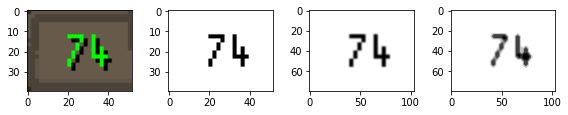

bw: 7, zoomed: , blurred: 74


In [11]:
img_to_str_bw_processing("number_74_green.png", size="medium")

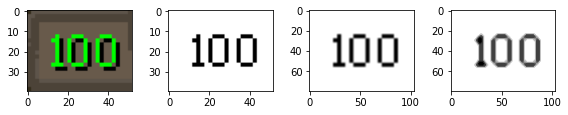

bw: 10, zoomed: 100, blurred: 100


In [12]:
img_to_str_bw_processing("number_100_green.png", size="medium")

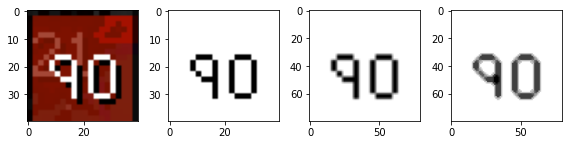

bw: 40, zoomed: 40, blurred: 90


In [13]:
img_to_str_bw_processing("hp_status_bar_hard.png", size="medium")

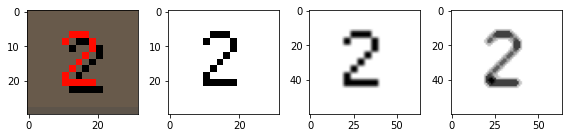

bw: 2, zoomed: 2, blurred: 2


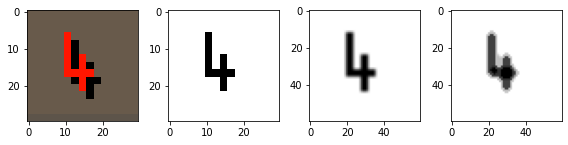

bw: 4, zoomed: , blurred: 4


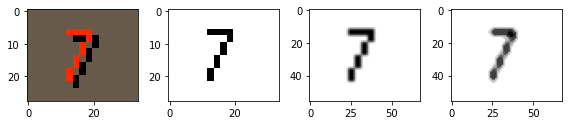

bw: , zoomed: 7, blurred: 7


In [14]:
img_to_str_bw_processing("number_2.png", size="medium")
img_to_str_bw_processing("number_4.png", size="medium")
img_to_str_bw_processing("number_7.png", size="medium")

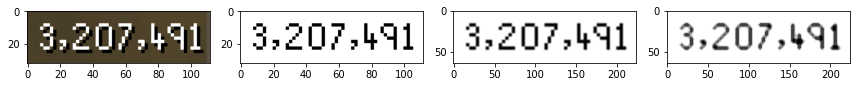

bw: 32207491, zoomed: 322074491, blurred: 3207491


In [15]:
img_to_str_bw_processing("number_long_white.png", size="large")

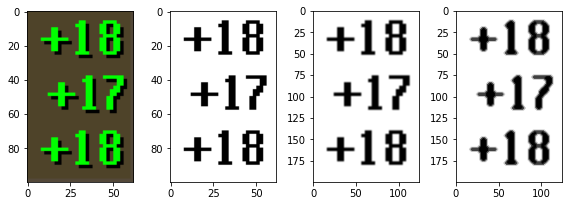

bw: +18
+17
+18, zoomed: +18
+17
+18, blurred: +18
+17
+18


In [16]:
img_to_str_bw_processing("number_boosts.png", size="medium")